# Ensemble Method pada dataset Heart


### 1. Inisialisasikan library yang diperlukan untuk dataset ini.

In [1]:
#inisialisasi library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


### 2. Masukan dataset Visit-Nominal.csv kedalam dataframe

In [8]:
#siapkan dataframe untuk mengambil attribut
df = pd.read_csv("\\Users\\aftermath\\Documents\\Machine Learning\\heartbeat dataset\\Heart.csv",header=None, skipinitialspace=True)
df = df.drop(df.columns[0], axis=1)

df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No


In [18]:
#masukan attribut kedalam array 
attrs = []
for attr in range(1,15):
    attrs.append(df.at[0,attr])
attrs

['Age',
 'Sex',
 'ChestPain',
 'RestBP',
 'Chol',
 'Fbs',
 'RestECG',
 'MaxHR',
 'ExAng',
 'Oldpeak',
 'Slope',
 'Ca',
 'Thal',
 'AHD']

In [22]:
#dataframe baru dengan nama kolom = attrs
dfnew = pd.read_csv("\\Users\\aftermath\\Documents\\Machine Learning\\heartbeat dataset\\Heart.csv",header=None, skipinitialspace=True)
dfnew = df.iloc[1:]
dfnew.drop(dfnew.index[[0,1]])
dfnew.columns = attrs
dfnew.index =  range(len(dfnew.index))
print(dfnew.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age          303 non-null object
Sex          303 non-null object
ChestPain    303 non-null object
RestBP       303 non-null object
Chol         303 non-null object
Fbs          303 non-null object
RestECG      303 non-null object
MaxHR        303 non-null object
ExAng        303 non-null object
Oldpeak      303 non-null object
Slope        303 non-null object
Ca           299 non-null object
Thal         301 non-null object
AHD          303 non-null object
dtypes: object(14)
memory usage: 33.2+ KB
None


In [23]:
print(dfnew.describe())

        Age  Sex     ChestPain RestBP Chol  Fbs RestECG MaxHR ExAng Oldpeak  \
count   303  303           303    303  303  303     303   303   303     303   
unique   41    2             4     50  152    2       3    91     2      40   
top      58    1  asymptomatic    120  204    0       0   162     0       0   
freq     19  206           144     37    6  258     151    11   204      99   

       Slope   Ca    Thal  AHD  
count    303  299     301  303  
unique     3    4       3    2  
top        1    0  normal   No  
freq     142  176     166  164  


In [24]:
dfnew.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No



### 3. Cek data null dan Preprocessing data

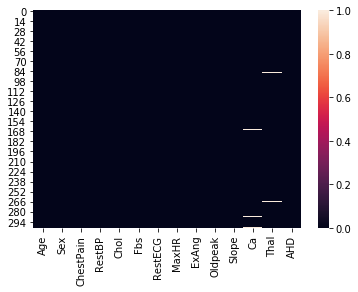

In [39]:
#Cek apakah ada missing value
missing_values = dfnew.isnull()

sns.heatmap(data = missing_values)

In [47]:
print("Ca:\n",dfnew['Ca'].value_counts())
print("\nThal:\n",dfnew['Thal'].value_counts())


Ca:
 0    176
1     65
2     38
3     20
Name: Ca, dtype: int64

Thal:
 normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64


In [35]:
#list isi dari kolom ChestPain dan Thal
#for attr in attrs:
#   print(attr," :\n",dfnew[attr].unique().tolist(),"\n")

print("ChestPain :\n",dfnew['ChestPain'].unique().tolist(),"\n")
print("ChestPain :\n",dfnew['ChestPain'].unique().tolist(),"\n")

Age  :
 ['63', '67', '37', '41', '56', '62', '57', '53', '44', '52', '48', '54', '49', '64', '58', '60', '50', '66', '43', '40', '69', '59', '42', '55', '61', '65', '71', '51', '46', '45', '39', '68', '47', '34', '35', '29', '70', '77', '38', '74', '76'] 

Sex  :
 ['1', '0'] 

ChestPain  :
 ['typical', 'asymptomatic', 'nonanginal', 'nontypical'] 

RestBP  :
 ['145', '160', '120', '130', '140', '172', '150', '110', '132', '117', '135', '112', '105', '124', '125', '142', '128', '170', '155', '104', '180', '138', '108', '134', '122', '115', '118', '100', '200', '94', '165', '102', '152', '101', '126', '174', '148', '178', '158', '192', '129', '144', '123', '136', '146', '106', '156', '154', '114', '164'] 

Chol  :
 ['233', '286', '229', '250', '204', '236', '268', '354', '254', '203', '192', '294', '256', '263', '199', '168', '239', '275', '266', '211', '283', '284', '224', '206', '219', '340', '226', '247', '167', '230', '335', '234', '177', '276', '353', '243', '225', '302', '212', '330

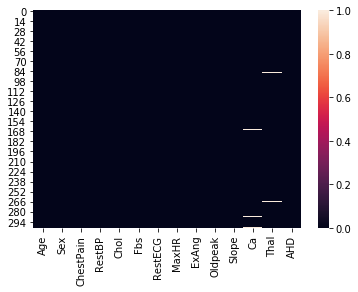